### Testing classes
- In this notebook, we look to make the galaxy catalogue (matched into an object) which then has its own set of pre-defined functions (methods) to create the plots we already have in a neater way.

In [395]:
import numpy as np
import pandas as pd
from astropy.io import fits
import catalog_init 
import catalog_process
import catalog
import imp
imp.reload(catalog_init)
imp.reload(catalog_process)
imp.reload(catalog)
import catalog_plot
imp.reload(catalog_plot)
from scipy.ndimage.filters import uniform_filter1d
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import copy
import scipy.stats as stats

inpath = '/Users/chrisduckworth/astronomy/projects/spin_bias/catalogues/'
info = catalog.Catalog(inpath)
info.match_to_cw(inpath)
info.remove_satellites()

ltg = copy.deepcopy(info) # creating copy of object instance.
ltg.select_morphology('ltg')
ltg.df.shape, info.df.shape

etg = copy.deepcopy(info) # creating copy of object instance.
etg.select_morphology('etg')
etg.df.shape, info.df.shape

/Users/chrisduckworth/astronomy/projects/spin_bias/scripts/class_scripts/catalog_init.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab['stellar_to_halo_ratio'] = np.log10(tab.nsa_elpetro_mass.values) -  tab.halo_mass_stel.values


((481, 418), (2032, 418))

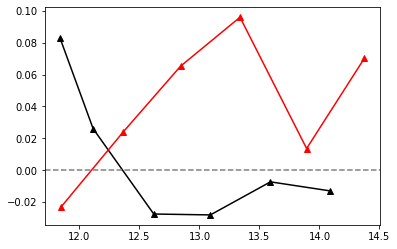

In [396]:
x_bins = np.array([12, 12.5, 13, 13.5, 14]) 
z_percentiles = np.array([0])

x_info, y_info, y_err_info = info.compute_binned_percentile_three_props("halo_mass_stel", "lambda_re", "stellar_to_halo_ratio", x_bins, z_percentiles)

z_percentiles = np.array([25, 50, 75])
x_info_p, y_info_p, y_err_info_p = info.compute_binned_percentile_three_props("halo_mass_stel", "lambda_re", "stellar_to_halo_ratio", x_bins, z_percentiles)

plt.plot(x_info_p[:,-1], y_info_p[:,-1] - y_info.flatten(), marker='^', label='top percentile', color='k')
#plt.plot(x_info_p[:,2], y_info_p[:,2] - y_info.flatten(), marker='^', label='bottom percentile', color='b')
#plt.plot(x_info_p[:,1], y_info_p[:,1] - y_info.flatten(), marker='^', label='bottom percentile', color='orange')
plt.plot(x_info_p[:,0], y_info_p[:,0] - y_info.flatten(), marker='^', label='bottom percentile', color='red')
plt.axhline(0, linestyle='dashed', color='gray')
plt.show()


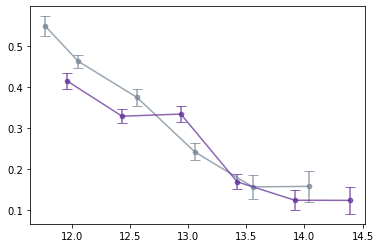

In [352]:
x_bins = np.array([12, 12.5, 13, 13.5, 14]) 
z_percentiles = np.array([25, 50, 75])
z_percentile_labels = ['Q1 $\mathrm{M_{stel}/M_{halo}}$', 'mid low', 'mid high', 'Q4 $\mathrm{M_{stel}/M_{halo}}$']

fig, ax = plt.subplots()
info.binned_percentiles_three_props("halo_mass_stel", "lambda_re", "halo_mass_stel", x_bins, z_percentiles, z_percentile_labels, ax, extrema=True)                           
plt.show()


In [ ]:
x_bins = np.array([12, 12.5, 13, 13.5, 14]) 

info.


In [ ]:
# computing residuals.

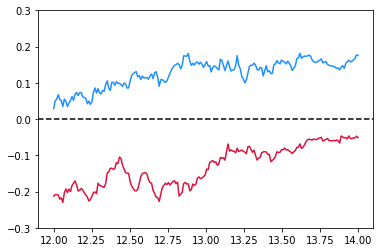

In [281]:
# creating test plot.
fig, ax = plt.subplots()

xrange = np.linspace(12, 14, 200)
ax.plot(xrange, p_ltg(xrange) - p_info(xrange), color='dodgerblue')
ax.plot(xrange, p_etg(xrange) - p_info(xrange), color='crimson')

ax.axhline(0, linestyle='dashed', color='k')
ax.set_ylim([-0.3, 0.3])
plt.show()

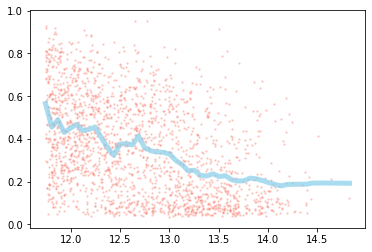

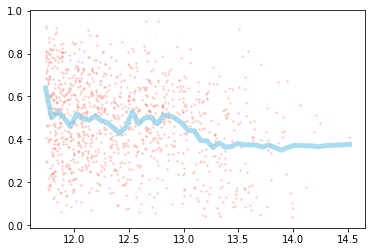

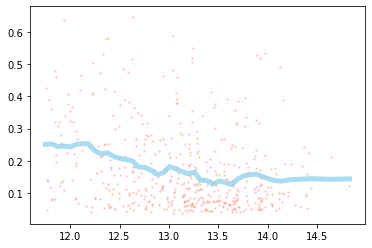

In [275]:
p_info = info.compute_expected_y("halo_mass_stel", "lambda_re", method='running_mean', n_neighbours=int(0.05*info.df.shape[0]) , return_plot=True)
p_ltg = ltg.compute_expected_y("halo_mass_stel", "lambda_re", method='running_mean', n_neighbours=int(0.05*ltg.df.shape[0]) , return_plot=True)
p_etg = etg.compute_expected_y("halo_mass_stel", "lambda_re", method='running_mean', n_neighbours=int(0.05*ltg.df.shape[0]) , return_plot=True)

